# California Housing Price Predictor
---

## Overview

- The dataset consists of the house prices in California in 2018.

---

## Import Libaries
---

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading 
---

In [243]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

## Data Exploration
---

In [244]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that in the column 'total_bedrooms', there is about 200 null-value data points. 

- We can either impute them with the median or drop the rows. Either approach would work for our task.

In [246]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [247]:
data.dropna(inplace=True)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into train and test sets

In [249]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [251]:
train_data = X_train.join(y_train)

In [252]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18105,-122.04,37.30,25.0,3807.0,600.0,1678.0,600.0,6.6818,<1H OCEAN,411300.0
12465,-121.43,38.57,46.0,2443.0,476.0,939.0,457.0,3.5893,INLAND,142000.0
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN,196100.0
8884,-118.50,34.03,52.0,1711.0,245.0,671.0,242.0,7.7572,<1H OCEAN,500001.0
19444,-121.04,37.68,28.0,1909.0,398.0,1140.0,380.0,2.3783,INLAND,81400.0
...,...,...,...,...,...,...,...,...,...,...
5229,-118.24,33.94,34.0,796.0,180.0,673.0,144.0,2.0769,<1H OCEAN,88300.0
12272,-116.99,33.99,22.0,4227.0,658.0,1849.0,619.0,4.7356,INLAND,195900.0
18563,-121.75,36.91,32.0,1461.0,422.0,1494.0,416.0,2.8056,<1H OCEAN,173200.0
20276,-119.21,34.19,15.0,5614.0,989.0,2754.0,994.0,5.0350,NEAR OCEAN,242900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

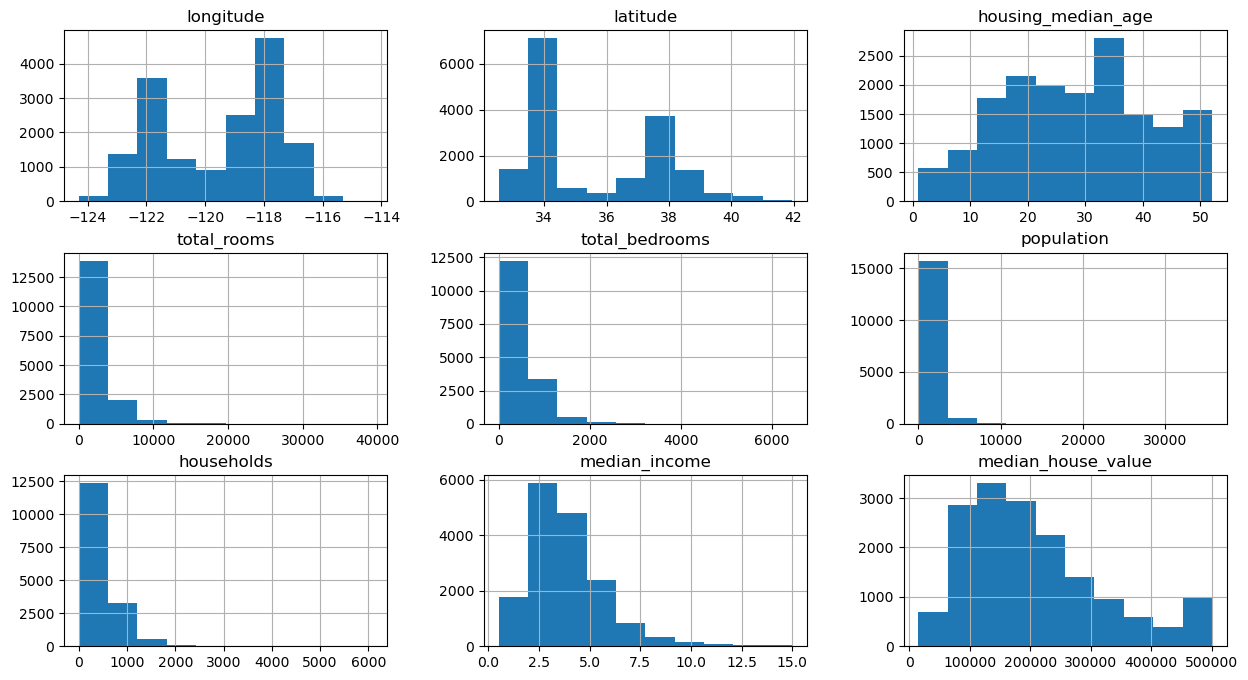

In [253]:
train_data.hist(figsize=(15,8))

In [254]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)

<Axes: >

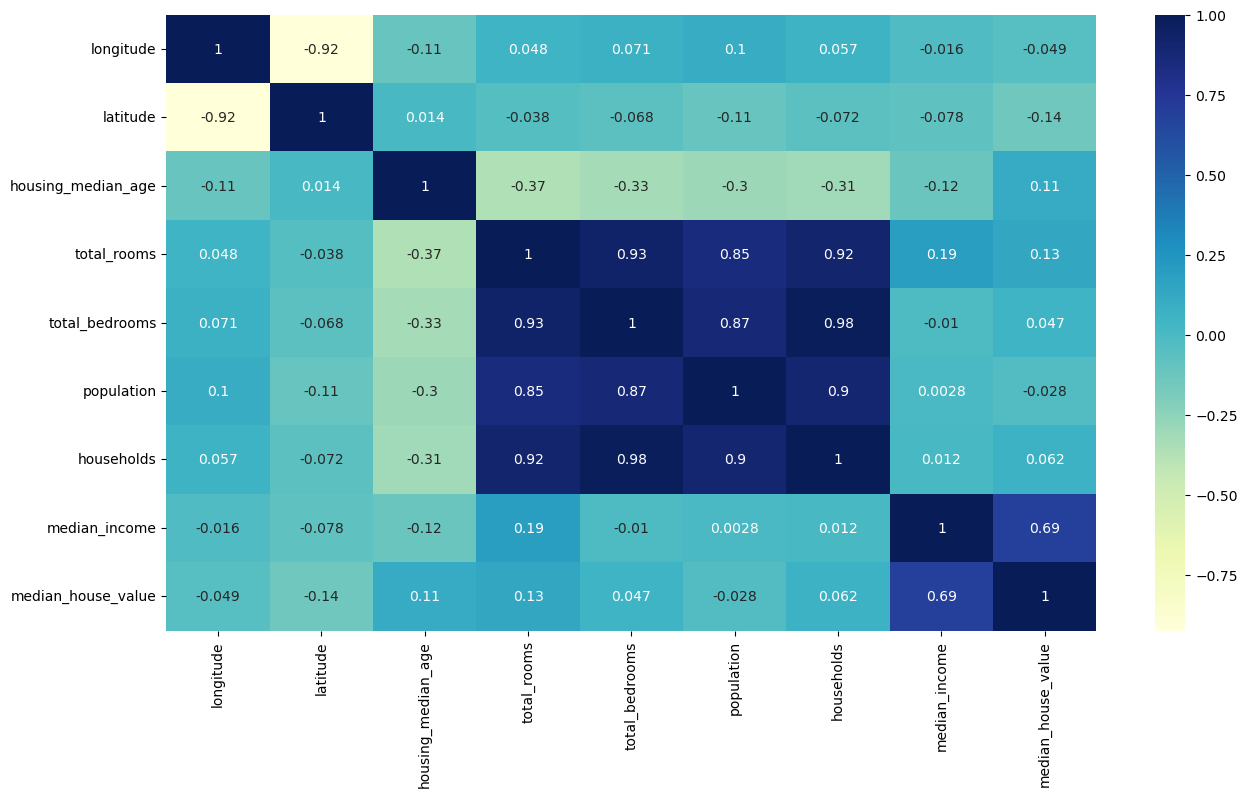

In [255]:
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="YlGnBu")

In [256]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

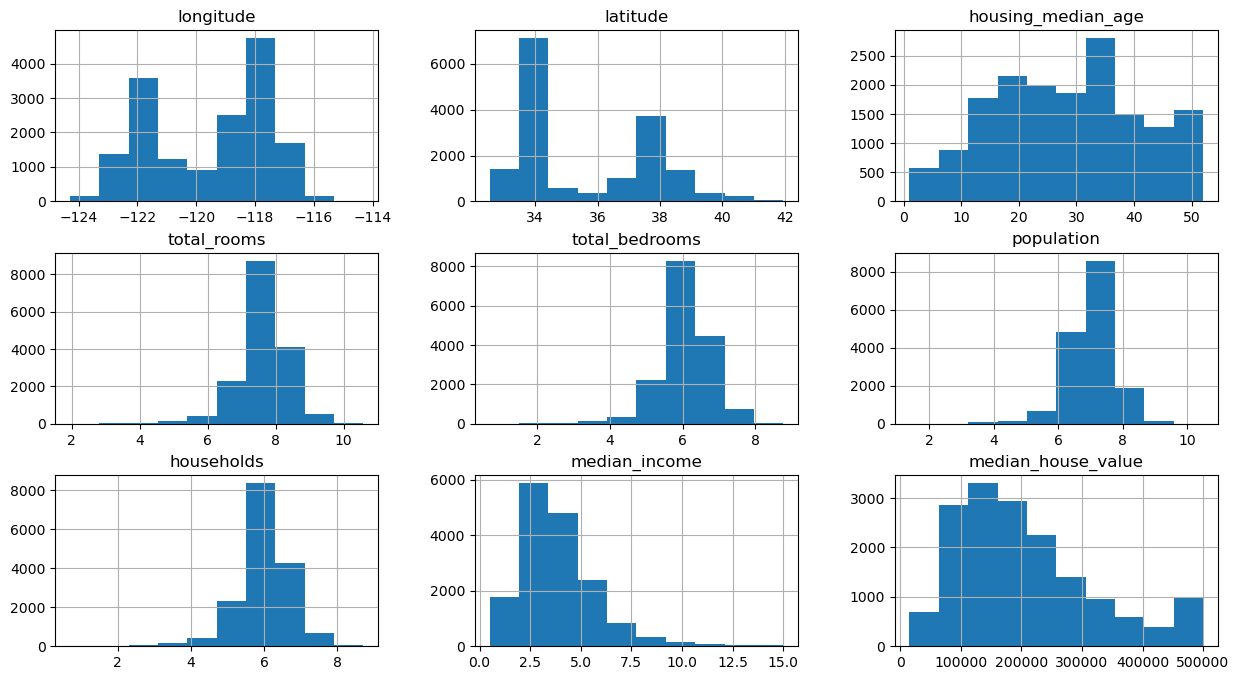

In [257]:
train_data.hist(figsize=(15,8))

In [258]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7199
INLAND        5215
NEAR OCEAN    2110
NEAR BAY      1818
ISLAND           4
Name: count, dtype: int64

In [259]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [260]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18105,-122.04,37.30,25.0,8.244859,6.398595,7.425954,6.398595,6.6818,411300.0,True,False,False,False,False
12465,-121.43,38.57,46.0,7.801391,6.167516,6.845880,6.126869,3.5893,142000.0,False,True,False,False,False
11162,-118.00,33.83,26.0,7.449498,5.955837,6.930495,5.910797,3.9333,196100.0,True,False,False,False,False
8884,-118.50,34.03,52.0,7.445418,5.505332,6.510258,5.493061,7.7572,500001.0,True,False,False,False,False
19444,-121.04,37.68,28.0,7.554859,5.988961,7.039660,5.942799,2.3783,81400.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,-118.24,33.94,34.0,6.680855,5.198497,6.513230,4.976734,2.0769,88300.0,True,False,False,False,False
12272,-116.99,33.99,22.0,8.349484,6.490724,7.522941,6.429719,4.7356,195900.0,False,True,False,False,False
18563,-121.75,36.91,32.0,7.287561,6.047372,7.309881,6.033086,2.8056,173200.0,True,False,False,False,False
20276,-119.21,34.19,15.0,8.633197,6.897705,7.921173,6.902743,5.0350,242900.0,False,False,False,False,True


<Axes: >

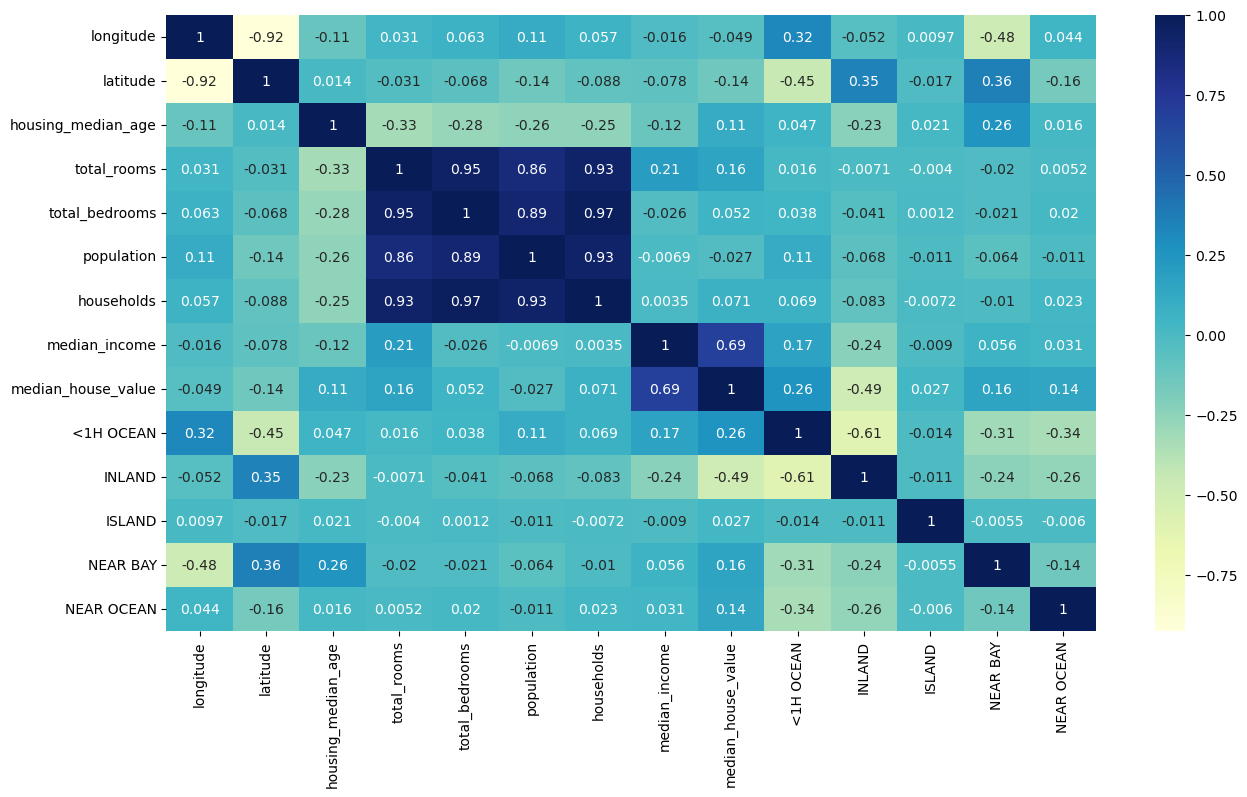

In [261]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

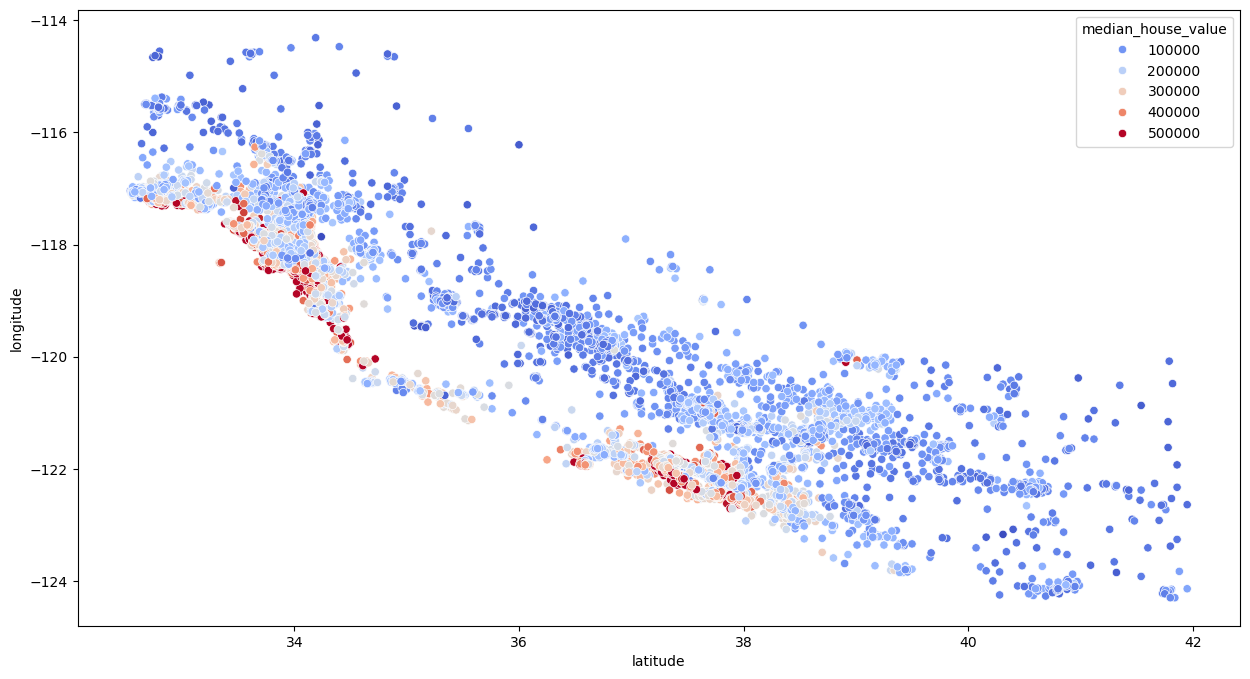

In [262]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [263]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

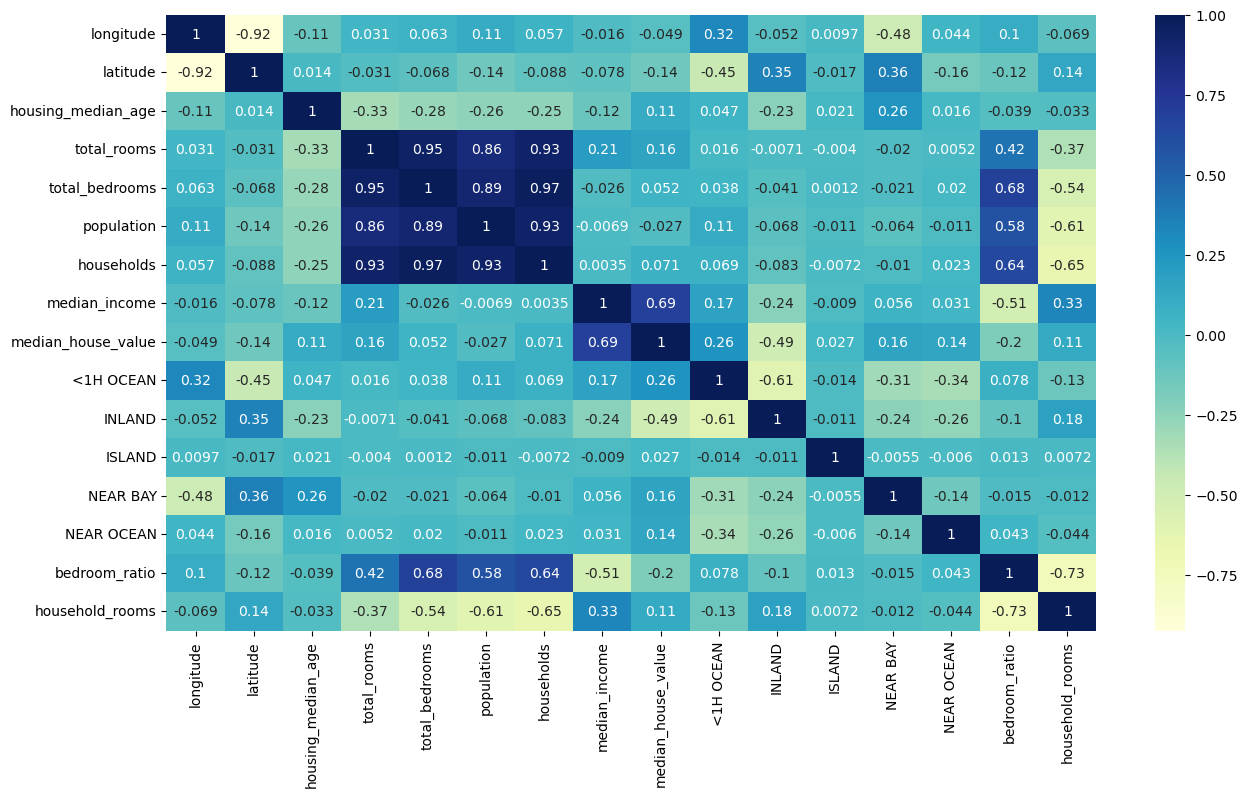

In [264]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [266]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [267]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [268]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10682,-117.76,33.53,24.0,7.652546,5.849325,6.569481,5.808142,10.6349,500001.0,True,False,False,False,False,0.764363,1.317555
10597,-117.80,33.69,14.0,7.496097,5.894403,6.774224,5.924256,4.2083,251000.0,True,False,False,False,False,0.786330,1.265323
9771,-121.40,36.38,39.0,7.735870,6.272877,7.279319,6.018593,3.3289,190600.0,True,False,False,False,False,0.810882,1.285329
19867,-119.34,36.34,5.0,8.413165,6.727432,7.559038,6.654153,4.0144,126600.0,False,True,False,False,False,0.799631,1.264348
19081,-122.48,38.31,29.0,7.773174,6.329721,7.025538,6.220590,2.3276,166200.0,True,False,False,False,False,0.814303,1.249588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20096,-120.24,38.01,11.0,7.102499,5.433722,6.452049,5.298317,3.1250,148600.0,False,True,False,False,False,0.765044,1.340520
18322,-122.13,37.45,41.0,8.081475,6.293419,7.132498,6.228511,6.6354,500001.0,False,False,False,True,False,0.778746,1.297497
8985,-118.44,33.98,21.0,9.805489,8.597851,8.913550,8.503297,5.3359,500001.0,True,False,False,False,False,0.876841,1.153140
1132,-121.62,39.76,14.0,7.632401,6.327937,6.840547,6.272877,1.7788,85800.0,False,True,False,False,False,0.829089,1.216731


In [269]:
X_test_s = scaler.transform(X_test)

In [270]:
reg.score(X_test_s, y_test)

0.6733489051431774

In [271]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [272]:
forest.score(X_test_s, y_test)

0.8158618861312233